https://www.kaggle.com/datasets/kutaykutlu/drowsiness-detection/data

In [34]:
import numpy as np 
import os
import tensorflow as tf

import matplotlib.pyplot as plt
from PIL import Image

from tqdm import tqdm

In [37]:
open_eyes_dir = 'Dataset/open_eye'
closed_eyes_dir = 'Dataset/closed_eye'

X = []
Y = []

# Process images from the directory containing images of open eyes
for filename in tqdm(os.listdir(open_eyes_dir)):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Adjust file extensions as needed
        filepath = os.path.join(open_eyes_dir, filename)
        temp = np.array(Image.open(filepath).resize((64, 64))) # Resize the images to 64x64
        X.append(temp)
        Y.append(1)

# Process images from the directory containing images of closed eyes
for filename in tqdm(os.listdir(closed_eyes_dir)):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Adjust file extensions as needed
        filepath = os.path.join(closed_eyes_dir, filename)
        temp = np.array(Image.open(filepath).resize((64, 64))) # Resize the images to 64x64
        X.append(temp)
        Y.append(0)
    

100%|██████████| 24000/24000 [02:40<00:00, 149.34it/s]


In [38]:
X = np.array(X)
X = X/255.0
Y = np.array(Y)

In [39]:
# X.shape

(48000, 64, 64)

In [40]:
X = np.expand_dims(X,-1)

In [41]:
# X.shape

(48000, 64, 64, 1)

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, BatchNormalization, MaxPooling2D,Dropout, Flatten

In [44]:
model = Sequential()

model.add(Input(shape=(64, 64, 1)))

model.add(Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu', use_bias=False))

model.add(BatchNormalization())
model.add(MaxPooling2D(strides = 2))
model.add(Dropout(0.3))


model.add(Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu', use_bias=False))

model.add(BatchNormalization())
model.add(MaxPooling2D(strides = 2))
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(units  = 256, activation = 'relu', use_bias=False))

model.add(BatchNormalization())
model.add(Dense(units = 128, use_bias=False, activation = 'relu'))
model.add(Dense(units = 84, use_bias=False, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(units = 1, activation = 'sigmoid'))


In [45]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [47]:
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='model.h5',
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose =1)
model.fit(x_train, y_train, validation_split=0.2, epochs=5, batch_size=32, callbacks=callback)

Epoch 1/5
960/960 [==============================] - ETA: 0s - loss: 0.1126 - accuracy: 0.9584
Epoch 1: val_loss improved from inf to 0.15241, saving model to model.h5
960/960 [==============================] - 133s 139ms/step - loss: 0.1126 - accuracy: 0.9584 - val_loss: 0.1524 - val_accuracy: 0.9431
Epoch 2/5


c:\Users\Jamil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


960/960 [==============================] - ETA: 0s - loss: 0.0573 - accuracy: 0.9807
Epoch 2: val_loss did not improve from 0.15241
960/960 [==============================] - 133s 139ms/step - loss: 0.0573 - accuracy: 0.9807 - val_loss: 0.2231 - val_accuracy: 0.9105
Epoch 3/5
960/960 [==============================] - ETA: 0s - loss: 0.0421 - accuracy: 0.9859
Epoch 3: val_loss improved from 0.15241 to 0.03466, saving model to model.h5
960/960 [==============================] - 136s 142ms/step - loss: 0.0421 - accuracy: 0.9859 - val_loss: 0.0347 - val_accuracy: 0.9893
Epoch 4/5
960/960 [==============================] - ETA: 0s - loss: 0.0323 - accuracy: 0.9893
Epoch 4: val_loss improved from 0.03466 to 0.02271, saving model to model.h5
960/960 [==============================] - 127s 133ms/step - loss: 0.0323 - accuracy: 0.9893 - val_loss: 0.0227 - val_accuracy: 0.9930
Epoch 5/5
960/960 [==============================] - ETA: 0s - loss: 0.0312 - accuracy: 0.9903
Epoch 5: val_loss did no

In [48]:
from keras.models import load_model
best_model = load_model('model.h5')
best_model.evaluate(x_test, y_test)

300/300 [==============================] - 10s 33ms/step - loss: 0.0262 - accuracy: 0.9909


[0.02621225267648697, 0.9909374713897705]

1/1 [==============================] - 0s 218ms/step


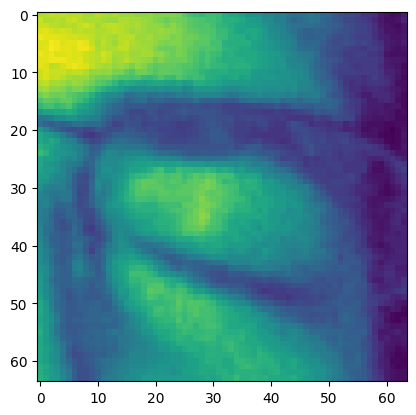

Closed
1/1 [==============================] - 0s 22ms/step


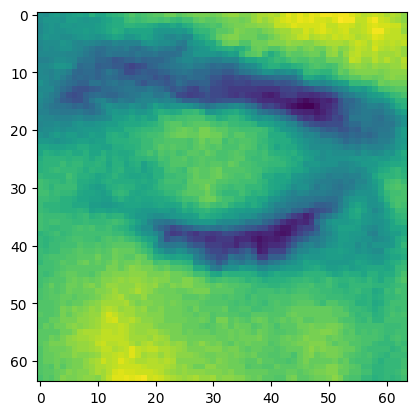

Closed
1/1 [==============================] - 0s 26ms/step


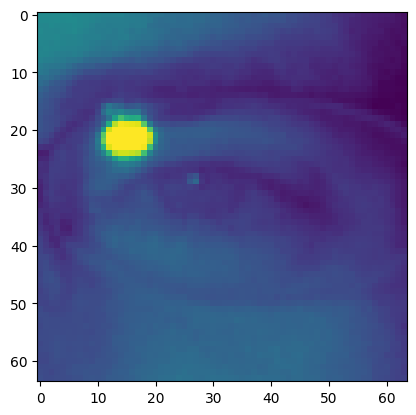

Open
1/1 [==============================] - 0s 30ms/step


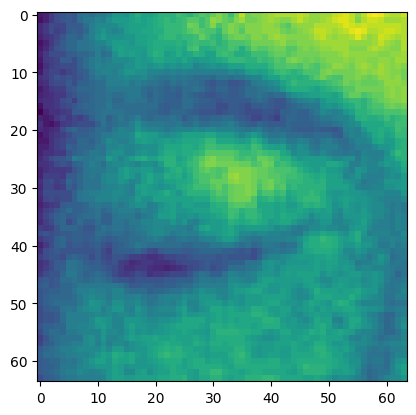

Closed
1/1 [==============================] - 0s 24ms/step


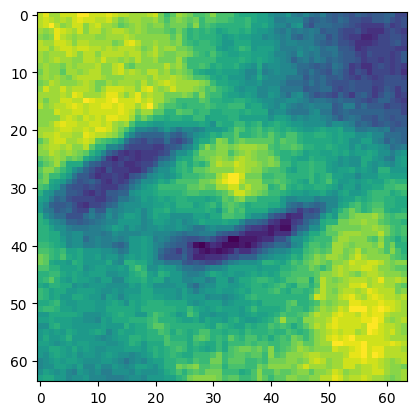

Closed


In [49]:
for i in x_test[10:15]:
    result = best_model.predict(np.expand_dims(i,0))
    plt.imshow(i)
    plt.show()
    
    if result > 0.5:
        print('Open')
    else:
        print("Closed")

In [50]:
import cv2
from keras.models import load_model
import numpy as np

In [53]:
lo1 = cv2.imread('Small Test Data/lo1.PNG')
ro1 = cv2.imread('Small Test Data/ro1.PNG')
lc1 = cv2.imread('Small Test Data/lc1.PNG')
rc1 = cv2.imread('Small Test Data/rc1.PNG')
lo2 = cv2.imread('Small Test Data/lo2.PNG')
lo3 = cv2.imread('Small Test Data/lo3.PNG')
ro2 = cv2.imread('Small Test Data/ro2.PNG')
ro3 = cv2.imread('Small Test Data/ro3.PNG')
imgs = [lo1, ro1, lc1, rc1, lo2, lo3, ro2, ro3]
model = load_model('bestModel.h5')

In [54]:
for img in imgs:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (64, 64))
    gray = gray/255.0
    gray = gray.reshape(64, 64, -1)
    gray = np.expand_dims(gray, 0)
    result = model.predict(gray)
    if result > 0.5:
        lbl = "Open"
    else:
        lbl = "Closed"
    cv2.putText(img, lbl, (10, 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    cv2.imshow('img', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    

1/1 [==============================] - 0s 24ms/step
